### Project Stage - II  Member Task , Data Modeling and Comparative Analysis

In [3]:
#import libraries

import pandas as pd
from datetime import datetime
import numpy as np

import plotly.express as px
#import plotly.io as pio

import plotly.express as px
import plotly.graph_objs as go

from IPython.display import Image
#pio.kaleido.scope.mathjax = None

import warnings
warnings.filterwarnings('ignore')

#### Read the Covid Super Data

In [10]:
#Read the merged file from the Stage 1 ,  this file has confirmed_cases , confirmed_deaths and population dataset. 
covid_supermerged_data = pd.read_csv('../../../../data/superdataset.csv')

In [3]:
covid_supermerged_data.tail()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
2346471,56045,weston county,WY,2022-02-03,1491,17,6927
2346472,56045,weston county,WY,2022-02-04,1496,17,6927
2346473,56045,weston county,WY,2022-02-05,1496,17,6927
2346474,56045,weston county,WY,2022-02-06,1496,17,6927
2346475,56045,weston county,WY,2022-02-07,1508,17,6927


###  Member task 1: Weekly statistics (mean, median, mode) for number of cases and deaths state ' Alabama' 

In [4]:
#Retrieving the data with State = 'AL'
AL_data= covid_supermerged_data[covid_supermerged_data['State']=="AL"]
AL_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
0,0,statewide unallocated,AL,2020-01-22,0,0,0
1,0,statewide unallocated,AL,2020-01-23,0,0,0
2,0,statewide unallocated,AL,2020-01-24,0,0,0
3,0,statewide unallocated,AL,2020-01-25,0,0,0
4,0,statewide unallocated,AL,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629
50860,1133,winston county,AL,2022-02-04,7183,115,23629
50861,1133,winston county,AL,2022-02-05,7183,115,23629
50862,1133,winston county,AL,2022-02-06,7183,115,23629


In [5]:
#Find the difference of the two columns Confirmed and Deaths
AL_data['Num of Cases per day'] = AL_data['Confirmed'].diff()
AL_data['Num of Deaths per day'] = AL_data['Deaths'].diff()
AL_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
0,0,statewide unallocated,AL,2020-01-22,0,0,0,NaN,NaN
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0


In [6]:
# removing the row that contains NAN 
AL_data= AL_data[AL_data['Date'] != '2020-01-22']
AL_data['Date'] = AL_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [7]:
AL_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
5,0,statewide unallocated,AL,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0


### Calculate the total number of cases and deaths per day 

In [8]:
AL_data_groupedBydate = AL_data.groupby("Date").sum().reset_index()
AL_data_groupedBydate

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
0,2020-01-23,71489,0,0,4903185,0.0,0.0
1,2020-01-24,71489,0,0,4903185,0.0,0.0
2,2020-01-25,71489,0,0,4903185,0.0,0.0
3,2020-01-26,71489,0,0,4903185,0.0,0.0
4,2020-01-27,71489,0,0,4903185,0.0,0.0
...,...,...,...,...,...,...,...
742,2022-02-03,71489,1229300,17215,4903185,0.0,0.0
743,2022-02-04,71489,1240496,17371,4903185,11196.0,156.0
744,2022-02-05,71489,1240496,17371,4903185,0.0,0.0
745,2022-02-06,71489,1240496,17371,4903185,0.0,0.0


### Normalize the columns by population by a factor 1000000

In [9]:
AL_data_groupedBydate['Cases per day normalized'] = (AL_data_groupedBydate['Num of Cases per day']/AL_data_groupedBydate['population'])*1000000
AL_data_groupedBydate['Deaths per day normalized'] = (AL_data_groupedBydate['Num of Deaths per day']/AL_data_groupedBydate['population'])*1000000
AL_data_groupedBydate

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized
0,2020-01-23,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
1,2020-01-24,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
2,2020-01-25,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
3,2020-01-26,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
4,2020-01-27,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
742,2022-02-03,71489,1229300,17215,4903185,0.0,0.0,0.000000,0.000000
743,2022-02-04,71489,1240496,17371,4903185,11196.0,156.0,2283.413740,31.816054
744,2022-02-05,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000
745,2022-02-06,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000


###  Weekly normalized number of cases and deaths 

In [10]:
AL_weekly_data = AL_data_groupedBydate.groupby([pd.Grouper(key='Date', freq='w')])['Cases per day normalized','Deaths per day normalized'].agg({'Cases per day normalized':'mean',
                                                                                                'Deaths per day normalized' :'mean'}).reset_index()
AL_weekly_data

,Date,Cases per day normalized,Deaths per day normalized
0,2020-01-26,0.000000,0.000000
1,2020-02-02,0.000000,0.000000
2,2020-02-09,0.000000,0.000000
3,2020-02-16,0.000000,0.000000
4,2020-02-23,0.000000,0.000000
...,...,...,...
103,2022-01-16,1362.787657,1.631593
104,2022-01-23,3387.273491,5.331811
105,2022-01-30,940.146922,0.058271
106,2022-02-06,2544.905578,15.878892


### Weekly statistics ( Mean , Median , Mode) of state 'Alabama'

In [11]:
# calculate the Mean 
AL_weekly_data.mean().round(decimals=0)

Cases per day normalized     345.0
Deaths per day normalized      5.0
dtype: float64

In [12]:
# calculate the Median
AL_weekly_data.median().round(decimals=0)

Cases per day normalized     190.0
Deaths per day normalized      3.0
dtype: float64

In [13]:
# calculate the Mode
AL_weekly_data[['Cases per day normalized','Deaths per day normalized']].mode().round(decimals=0)

,Cases per day normalized,Deaths per day normalized
0,0.0,0.0


###  Member Task 2 : Comparing the data against 5 chosen states.


Selected states are 
* California
* Arizona
* North Carolina
* Minnesota
* Arkansas

In [14]:
#Filter the states
compareother_states= covid_supermerged_data[covid_supermerged_data["State"].isin(["AZ","MN","NC","AR","CA","AL"])]
compareother_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
0,0,statewide unallocated,AL,2020-01-22,0,0,0
1,0,statewide unallocated,AL,2020-01-23,0,0,0
2,0,statewide unallocated,AL,2020-01-24,0,0,0
3,0,statewide unallocated,AL,2020-01-25,0,0,0
4,0,statewide unallocated,AL,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
1501231,37199,yancey county,NC,2022-02-03,4425,46,18069
1501232,37199,yancey county,NC,2022-02-04,4439,48,18069
1501233,37199,yancey county,NC,2022-02-05,4439,48,18069
1501234,37199,yancey county,NC,2022-02-06,4439,48,18069


In [15]:
#Calculate new cases and deaths using the diff()
compareother_states['Cases per day'] = compareother_states['Confirmed'].diff()
compareother_states['Deaths per day'] = compareother_states['Deaths'].diff()
compareother_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Cases per day,Deaths per day
0,0,statewide unallocated,AL,2020-01-22,0,0,0,NaN,NaN
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1501231,37199,yancey county,NC,2022-02-03,4425,46,18069,18.0,1.0
1501232,37199,yancey county,NC,2022-02-04,4439,48,18069,14.0,2.0
1501233,37199,yancey county,NC,2022-02-05,4439,48,18069,0.0,0.0
1501234,37199,yancey county,NC,2022-02-06,4439,48,18069,0.0,0.0


In [16]:
#remove the row with NAN
compareother_states= compareother_states[compareother_states['Date'] != '2020-01-22']
compareother_states['Date'] = compareother_states.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
compareother_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Cases per day,Deaths per day
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
5,0,statewide unallocated,AL,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1501231,37199,yancey county,NC,2022-02-03,4425,46,18069,18.0,1.0
1501232,37199,yancey county,NC,2022-02-04,4439,48,18069,14.0,2.0
1501233,37199,yancey county,NC,2022-02-05,4439,48,18069,0.0,0.0
1501234,37199,yancey county,NC,2022-02-06,4439,48,18069,0.0,0.0


### Grouping the columns by date and state and summing the values for each date.

In [17]:
other_states_groupedByDate = compareother_states.groupby(["State","Date"]).sum().reset_index()
other_states_groupedByDate

,State,Date,countyFIPS,Confirmed,Deaths,population,Cases per day,Deaths per day
0,AL,2020-01-23,71489,0,0,4903185,0.0,0.0
1,AL,2020-01-24,71489,0,0,4903185,0.0,0.0
2,AL,2020-01-25,71489,0,0,4903185,0.0,0.0
3,AL,2020-01-26,71489,0,0,4903185,0.0,0.0
4,AL,2020-01-27,71489,0,0,4903185,0.0,0.0
...,...,...,...,...,...,...,...,...
4477,NC,2022-02-03,3710000,2457857,21027,10488084,14966.0,123.0
4478,NC,2022-02-04,3710000,2470242,21097,10488084,12385.0,70.0
4479,NC,2022-02-05,3710000,2470242,21097,10488084,0.0,0.0
4480,NC,2022-02-06,3710000,2470242,21097,10488084,0.0,0.0


###  Normalize the new cases and deaths in each state for all the days

In [18]:
other_states_groupedByDate['Num of Cases per day normalized'] = (other_states_groupedByDate['Cases per day']/other_states_groupedByDate['population'])*1000000
other_states_groupedByDate['Num of Deaths per day normalized'] = (other_states_groupedByDate['Deaths per day']/other_states_groupedByDate['population'])*1000000
other_states_groupedByDate

,State,Date,countyFIPS,Confirmed,Deaths,population,Cases per day,Deaths per day,Num of Cases per day normalized,Num of Deaths per day normalized
0,AL,2020-01-23,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
1,AL,2020-01-24,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
2,AL,2020-01-25,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
3,AL,2020-01-26,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
4,AL,2020-01-27,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4477,NC,2022-02-03,3710000,2457857,21027,10488084,14966.0,123.0,1426.952721,11.727595
4478,NC,2022-02-04,3710000,2470242,21097,10488084,12385.0,70.0,1180.863921,6.674241
4479,NC,2022-02-05,3710000,2470242,21097,10488084,0.0,0.0,0.000000,0.000000
4480,NC,2022-02-06,3710000,2470242,21097,10488084,0.0,0.0,0.000000,0.000000


### Weekly total of cases and deaths for each state

In [19]:
other_states_weekly = other_states_groupedByDate.groupby(["State", pd.Grouper(key='Date', freq='w')])['Num of Cases per day normalized','Num of Deaths per day normalized'].agg({'Num of Cases per day normalized':'mean',
                                                                                                'Num of Deaths per day normalized' :'mean'}).reset_index()
other_states_weekly

,State,Date,Num of Cases per day normalized,Num of Deaths per day normalized
0,AL,2020-01-26,0.000000,0.000000
1,AL,2020-02-02,0.000000,0.000000
2,AL,2020-02-09,0.000000,0.000000
3,AL,2020-02-16,0.000000,0.000000
4,AL,2020-02-23,0.000000,0.000000
...,...,...,...,...
643,NC,2022-01-16,2655.013061,3.868336
644,NC,2022-01-23,2261.818542,2.792284
645,NC,2022-01-30,2690.250329,6.633378
646,NC,2022-02-06,1299.106954,6.837692


### Plotting weekly graph on normalized cases and deaths

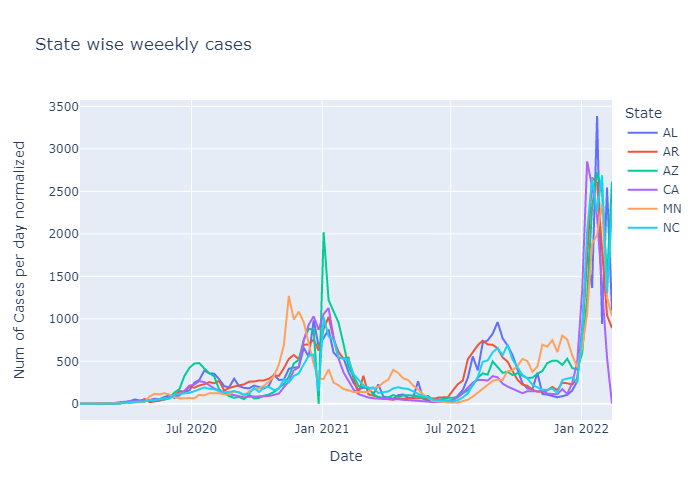

In [20]:
fig = px.line(other_states_weekly, x="Date", y="Num of Cases per day normalized", color= "State",
line_group="State", hover_name="State", title ='State wise weeekly cases')
#fig.show()

fig.write_image("Priyanka_Graphs/statewiseweeeklycases.png") 
Image(filename="Priyanka_Graphs/statewiseweeeklycases.png")

## Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

## Inference : 

State wise weekly cases: 

1. Alabama has spiked highest in Jan 2022 , there was a new variant due to which the number of cases increased. Also, it was        christmas and new years eve which led to increase in cases as the number of social gathering increased.
2. There are peaks observed in other states as well but Alabama holds significantly high in Jan 2022.
3. Another reason for the increase in covid cases in Jan 2021 was due to the  removal of mask mandate in states like NC , CA ,      AL , AR etc.
4. The peaks were observed in July 2021 in most of the states and again ALABAMA stands highest in the number of cases. Alabama      ranks 4th highest state in the USA, to record the increasing cases during this time.
5. July 2021 was peak time of many international students travelling to the United States for education purposes and this led to    the increase in the covid cases in the states i.e AL , NC ,AR ,CA , MN. These states have good universities which further        spread the covid cases.
6. Again, the spike was observed in Jan 2021. This was the effect of social gatherings due to New Year and Christmas. 

Conclusion: We observe that the spread of covid was due to socail gatherings and international travels during Jan 2022 , July 2021 and Jan 2021. Though there were vaccinations available few people rushed to get the vaccines and this also led to crowd gathering and spread of covid increaded. 


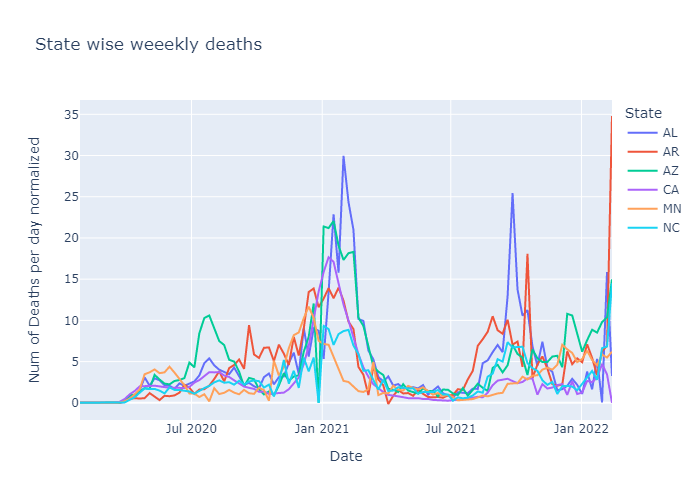

In [21]:
fig = px.line(other_states_weekly, x="Date", y="Num of Deaths per day normalized", color= "State",
line_group="State", hover_name="State", title ='State wise weeekly deaths')
#fig.show()


fig.write_image("Priyanka_Graphs/statewiseweeeklydeaths.png") 
Image(filename="Priyanka_Graphs/statewiseweeeklydeaths.png")

### Inference  : 

State wise weekly deaths : 

1. The deaths were observed more in Arkansas state for Jan 2022. This was the time when the ONNICRON had spread in the country and many          people were infected from this virus even after taking the vaccines.

2. Due to influx of patients in the hospital with no availaibilty of beds and necessary equipments to treat the patients , the      death rates increased.

3. As mentioned above the mask mandate was removed in the USA and hence the confirmed case increased which led to the increase      in death rate.
4. In Aug 2021, Alabama had more cases compared to the other states. This was the effect of delta variat which hit this state      worsely. But in other states the delta variant breakout was low.

5. In Jan 2021, Alabama had more deaths due to the holiday season and health protocols were not followed. 

Conclusion :  The peaks were high for the chosen states in the month of August 2021 to December 2021 and again in Feb 2021 to May 2021. That was when the second wave hit the country due to delta variant. In Jan 2022 the country was hit by OMNICRON rising cases. 

### Weekly mean and median of the number of cases  of five states

In [22]:
other_states_weekly_confirmedcases=other_states_weekly.groupby('State')['Num of Cases per day normalized'].agg(['mean','median']).reset_index()
other_states_weekly_confirmedcases

,State,mean,median
0,AL,344.813124,190.328182
1,AR,346.255933,214.986034
2,AZ,370.122854,177.788397
3,CA,272.740007,113.277858
4,MN,328.326425,171.427092
5,NC,332.792764,173.891219


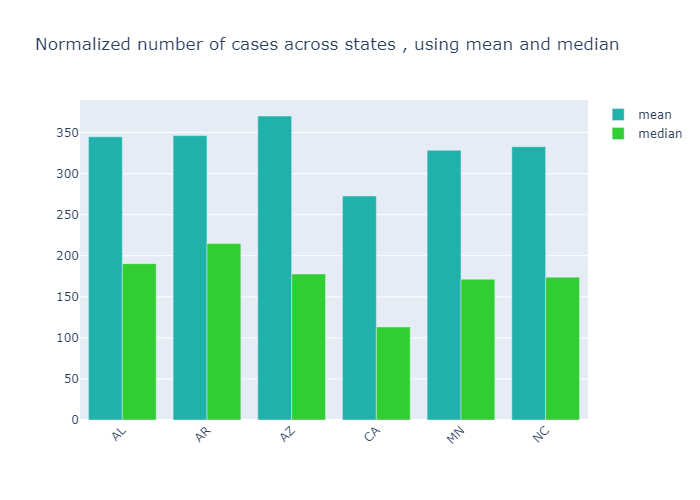

In [23]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_states_weekly_confirmedcases['State'],
    y=other_states_weekly_confirmedcases['mean'],
    name='mean',
    marker_color='lightseagreen'
))
fig.add_trace(go.Bar(
    x=other_states_weekly_confirmedcases['State'],
    y=other_states_weekly_confirmedcases['median'],
    name='median',
    marker_color='limegreen'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Normalized number of cases across states , using mean and median")

fig.write_image("Priyanka_Graphs/Normalized number of cases across states , using mean and median.png") 
Image(filename="Priyanka_Graphs/Normalized number of cases across states , using mean and median.png")


### Inferences from the graph
1. From the above figure we conclude that the mean that was calculated weekly on number of cases for Arizona state is the highest and is lowest in California state. 
2. Arkansas has highest median and California has lowest.

### Calculate the weekly mean and median of the number of deaths 

In [24]:
other_states_weekly_deaths_data =other_states_weekly.groupby('State')['Num of Deaths per day normalized'].agg(['mean','median']).reset_index()
other_states_weekly_deaths_data

,State,mean,median
0,AL,4.716457,2.942694
1,AR,4.601001,3.384675
2,AZ,4.959920,3.356164
3,CA,2.722670,1.849012
4,MN,2.777959,1.785831
5,NC,2.794933,2.002272


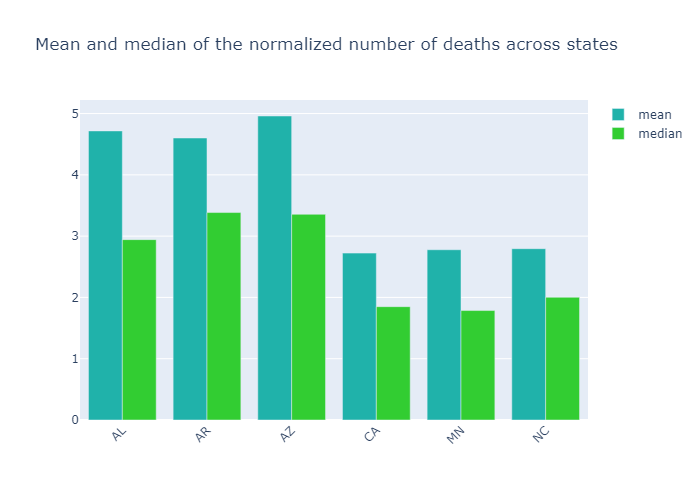

In [25]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_states_weekly_deaths_data['State'],
    y=other_states_weekly_deaths_data['mean'],
    name='mean',
    marker_color='lightseagreen'
))
fig.add_trace(go.Bar(
    x=other_states_weekly_deaths_data['State'],
    y=other_states_weekly_deaths_data['median'],
    name='median',
    marker_color='limegreen'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Mean and median of the normalized number of deaths across states")

fig.write_image("Priyanka_Graphs/Mean and median of the normalized number of deaths across states.png")
Image(filename ="Priyanka_Graphs/Mean and median of the normalized number of deaths across states.png")
#fig.show()


### Inferences from the graph

1. From the above figure we conclude that the mean that was calculated weekly on number of cases for Arizona state is the highest and is lowest in California state. 
2. Median is highest in Arkansas and lowest in Minnesota



## Member Task 3 - Identify counties with high case and death rates.

- To find the high cases and deaths in county , use the ALABAMA state data. 
- Remove the  statewide unallocated from the dataset
- sort the values for cases and deaths 
- Use the county with high deaths and cases.

In [26]:
# Remove county_name =  "statewide unallocated"
AL_data= AL_data[AL_data['County_Name'] != 'statewide unallocated']
AL_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
749,1001,autauga county,AL,2020-01-23,0,0,55869,0.0,0.0
750,1001,autauga county,AL,2020-01-24,0,0,55869,0.0,0.0
751,1001,autauga county,AL,2020-01-25,0,0,55869,0.0,0.0
752,1001,autauga county,AL,2020-01-26,0,0,55869,0.0,0.0
753,1001,autauga county,AL,2020-01-27,0,0,55869,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0


In [27]:
#Calculate the sum of new cases and deaths on the counties of AL state
AL_county_data = AL_data.groupby(['countyFIPS','County_Name','population'])[['Num of Cases per day','Num of Deaths per day']].agg('sum').reset_index()
AL_county_data

,countyFIPS,County_Name,population,Num of Cases per day,Num of Deaths per day
0,1001,autauga county,55869,15046.0,171.0
1,1003,baldwin county,223234,53768.0,624.0
2,1005,barbour county,24686,5356.0,85.0
3,1007,bibb county,22394,6224.0,96.0
4,1009,blount county,57826,14366.0,211.0
...,...,...,...,...,...
62,1125,tuscaloosa county,209355,52640.0,696.0
63,1127,walker county,63521,17865.0,399.0
64,1129,washington county,16326,3501.0,53.0
65,1131,wilcox county,10373,2764.0,40.0


In [28]:
#normalize the data by using the scale value as 1000.
AL_county_data['Num of Cases per day normalized'] = (AL_county_data['Num of Cases per day']/AL_county_data['population'])*1000
AL_county_data['Num of Deaths per day normalized'] = (AL_county_data['Num of Deaths per day']/AL_county_data['population'])*1000
AL_county_data

,countyFIPS,County_Name,population,Num of Cases per day,Num of Deaths per day,Num of Cases per day normalized,Num of Deaths per day normalized
0,1001,autauga county,55869,15046.0,171.0,269.308561,3.060731
1,1003,baldwin county,223234,53768.0,624.0,240.859367,2.795273
2,1005,barbour county,24686,5356.0,85.0,216.965081,3.443247
3,1007,bibb county,22394,6224.0,96.0,277.931589,4.286863
4,1009,blount county,57826,14366.0,211.0,248.434960,3.648878
...,...,...,...,...,...,...,...
62,1125,tuscaloosa county,209355,52640.0,696.0,251.438943,3.324497
63,1127,walker county,63521,17865.0,399.0,281.245572,6.281387
64,1129,washington county,16326,3501.0,53.0,214.443219,3.246356
65,1131,wilcox county,10373,2764.0,40.0,266.461005,3.856165


In [29]:
#Finding the highest cases by sorting in descending order 
AL_county_data.sort_values(by=['Num of Cases per day normalized' , 'Num of Deaths per day normalized'],ascending=False).head(5)

,countyFIPS,County_Name,population,Num of Cases per day,Num of Deaths per day,Num of Cases per day normalized,Num of Deaths per day normalized
66,1133,winston county,23629,7227.0,115.0,305.852977,4.866901
32,1065,hale county,14651,4465.0,95.0,304.757354,6.484199
29,1059,franklin county,31362,9549.0,123.0,304.476755,3.921944
13,1027,clay county,13235,3966.0,72.0,299.659992,5.440121
12,1025,clarke county,23622,6900.0,93.0,292.100584,3.937008


#### Th number of cases per day top 5 infected counties are :
- winston county
- hale county	
- franklinn county
- clay county
- clarke county	

###  Member task 4

In [5]:
#filter AL state from the merged dataset
AL_data_new= covid_supermerged_data[covid_supermerged_data['State']=="AL"]
AL_data_new

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
0,0,statewide unallocated,AL,2020-01-22,0,0,0
1,0,statewide unallocated,AL,2020-01-23,0,0,0
2,0,statewide unallocated,AL,2020-01-24,0,0,0
3,0,statewide unallocated,AL,2020-01-25,0,0,0
4,0,statewide unallocated,AL,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629
50860,1133,winston county,AL,2022-02-04,7183,115,23629
50861,1133,winston county,AL,2022-02-05,7183,115,23629
50862,1133,winston county,AL,2022-02-06,7183,115,23629


In [31]:
AL_data_new['Num of Cases per day'] = AL_data_new['Confirmed'].diff()
AL_data_new['Num of Deaths per day'] = AL_data_new['Deaths'].diff()
AL_data_new

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
0,0,statewide unallocated,AL,2020-01-22,0,0,0,NaN,NaN
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0


In [6]:
AL_data_new= AL_data_new[AL_data_new['Date'] != '2020-01-22']

In [33]:
AL_data_new['Date'] = AL_data_new.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [34]:
AL_data_new

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
5,0,statewide unallocated,AL,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0


In [35]:
#Normalize the data per day
AL_data_new['Cases per day normalized'] = (AL_data_new['Num of Cases per day']/AL_data_new['population'])*1000000
AL_data_new['Deaths per day normalized'] = (AL_data_new['Num of Deaths per day']/AL_data_new['population'])*1000000
AL_data_new

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0,NaN,NaN
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0,NaN,NaN
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0,NaN,NaN
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0,NaN,NaN
5,0,statewide unallocated,AL,2020-01-27,0,0,0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0,0.000000,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0,5332.430488,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0,0.000000,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0,0.000000,0.0


In [36]:
#Remove the data with state unallocated 
AL_data_new= AL_data_new[AL_data_new['County_Name'] != 'statewide unallocated']
AL_data_new

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized
749,1001,autauga county,AL,2020-01-23,0,0,55869,0.0,0.0,0.000000,0.0
750,1001,autauga county,AL,2020-01-24,0,0,55869,0.0,0.0,0.000000,0.0
751,1001,autauga county,AL,2020-01-25,0,0,55869,0.0,0.0,0.000000,0.0
752,1001,autauga county,AL,2020-01-26,0,0,55869,0.0,0.0,0.000000,0.0
753,1001,autauga county,AL,2020-01-27,0,0,55869,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629,0.0,0.0,0.000000,0.0
50860,1133,winston county,AL,2022-02-04,7183,115,23629,126.0,0.0,5332.430488,0.0
50861,1133,winston county,AL,2022-02-05,7183,115,23629,0.0,0.0,0.000000,0.0
50862,1133,winston county,AL,2022-02-06,7183,115,23629,0.0,0.0,0.000000,0.0


In [37]:
#Fing the log normalized vales
AL_data_new['Log normalized number of cases'] = np.log(AL_data_new['Cases per day normalized'])
AL_data_new['Log normalized number of deaths'] = np.log(AL_data_new['Deaths per day normalized'])


AL_data_new=AL_data_new[['County_Name', 'Date', 'Num of Cases per day', 'Num of Deaths per day','Cases per day normalized','Deaths per day normalized','Log normalized number of cases','Log normalized number of deaths']]
AL_data_new

,County_Name,Date,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized,Log normalized number of cases,Log normalized number of deaths
749,autauga county,2020-01-23,0.0,0.0,0.000000,0.0,-inf,-inf
750,autauga county,2020-01-24,0.0,0.0,0.000000,0.0,-inf,-inf
751,autauga county,2020-01-25,0.0,0.0,0.000000,0.0,-inf,-inf
752,autauga county,2020-01-26,0.0,0.0,0.000000,0.0,-inf,-inf
753,autauga county,2020-01-27,0.0,0.0,0.000000,0.0,-inf,-inf
...,...,...,...,...,...,...,...,...
50859,winston county,2022-02-03,0.0,0.0,0.000000,0.0,-inf,-inf
50860,winston county,2022-02-04,126.0,0.0,5332.430488,0.0,8.581562,-inf
50861,winston county,2022-02-05,0.0,0.0,0.000000,0.0,-inf,-inf
50862,winston county,2022-02-06,0.0,0.0,0.000000,0.0,-inf,-inf


In [8]:
#Top 5 Al counties with high deaths and cases
five_county_data_top = AL_data_new[AL_data_new["County_Name"].isin(["winston county","hale county", "franklin county","clay county","clarke county"])]
five_county_data_top

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
9725,1025,clarke county,AL,2020-01-23,0,0,23622
9726,1025,clarke county,AL,2020-01-24,0,0,23622
9727,1025,clarke county,AL,2020-01-25,0,0,23622
9728,1025,clarke county,AL,2020-01-26,0,0,23622
9729,1025,clarke county,AL,2020-01-27,0,0,23622
...,...,...,...,...,...,...,...
50859,1133,winston county,AL,2022-02-03,7057,115,23629
50860,1133,winston county,AL,2022-02-04,7183,115,23629
50861,1133,winston county,AL,2022-02-05,7183,115,23629
50862,1133,winston county,AL,2022-02-06,7183,115,23629


In [39]:
#Calculate the mean of the Num of Cases per day normalized , deaths and lognormalized cases and deaths

five_county_data_top = five_county_data_top.groupby(['County_Name' , pd.Grouper(key='Date', freq='w')])['Num of Cases per day','Num of Deaths per day' , 'Log normalized number of cases' , 'Log normalized number of deaths'].agg({'Num of Cases per day':'mean','Num of Deaths per day' :'mean' , 'Log normalized number of cases'  : 'mean' ,'Log normalized number of deaths' : 'mean' }).reset_index()
five_county_data_top

,County_Name,Date,Num of Cases per day,Num of Deaths per day,Log normalized number of cases,Log normalized number of deaths
0,clarke county,2020-01-26,0.000000,0.000000,-inf,-inf
1,clarke county,2020-02-02,0.000000,0.000000,-inf,-inf
2,clarke county,2020-02-09,0.000000,0.000000,-inf,-inf
3,clarke county,2020-02-16,0.000000,0.000000,-inf,-inf
4,clarke county,2020-02-23,0.000000,0.000000,-inf,-inf
...,...,...,...,...,...,...
535,winston county,2022-01-16,23.142857,0.000000,-inf,-inf
536,winston county,2022-01-23,108.000000,0.000000,-inf,-inf
537,winston county,2022-01-30,37.142857,0.000000,-inf,-inf
538,winston county,2022-02-06,122.857143,0.142857,-inf,-inf


In [40]:
five_county_data_top1 = AL_data_new[AL_data_new["County_Name"].isin(["winston county","hale county", "franklin county","clay county","clarke county"])]
five_county_data_top1

,County_Name,Date,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized,Log normalized number of cases,Log normalized number of deaths
9725,clarke county,2020-01-23,0.0,0.0,0.000000,0.0,-inf,-inf
9726,clarke county,2020-01-24,0.0,0.0,0.000000,0.0,-inf,-inf
9727,clarke county,2020-01-25,0.0,0.0,0.000000,0.0,-inf,-inf
9728,clarke county,2020-01-26,0.0,0.0,0.000000,0.0,-inf,-inf
9729,clarke county,2020-01-27,0.0,0.0,0.000000,0.0,-inf,-inf
...,...,...,...,...,...,...,...,...
50859,winston county,2022-02-03,0.0,0.0,0.000000,0.0,-inf,-inf
50860,winston county,2022-02-04,126.0,0.0,5332.430488,0.0,8.581562,-inf
50861,winston county,2022-02-05,0.0,0.0,0.000000,0.0,-inf,-inf
50862,winston county,2022-02-06,0.0,0.0,0.000000,0.0,-inf,-inf


### Weekly grouping of 5 counties

In [41]:
five_county_data_top1 = five_county_data_top1.groupby(['County_Name' , pd.Grouper(key='Date', freq='w')])['Num of Cases per day','Num of Deaths per day' , 'Cases per day normalized' , 'Deaths per day normalized'].agg({'Num of Cases per day':'mean','Num of Deaths per day' :'mean' , 'Cases per day normalized'  : 'mean' ,'Deaths per day normalized' : 'mean' }).reset_index()
five_county_data_top1

,County_Name,Date,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized
0,clarke county,2020-01-26,0.000000,0.000000,0.000000,0.00000
1,clarke county,2020-02-02,0.000000,0.000000,0.000000,0.00000
2,clarke county,2020-02-09,0.000000,0.000000,0.000000,0.00000
3,clarke county,2020-02-16,0.000000,0.000000,0.000000,0.00000
4,clarke county,2020-02-23,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...
535,winston county,2022-01-16,23.142857,0.000000,979.426008,0.00000
536,winston county,2022-01-23,108.000000,0.000000,4570.654704,0.00000
537,winston county,2022-01-30,37.142857,0.000000,1571.918284,0.00000
538,winston county,2022-02-06,122.857143,0.142857,5199.422018,6.04584


## PLOTS 

### Top 5 infected counties weekly trends

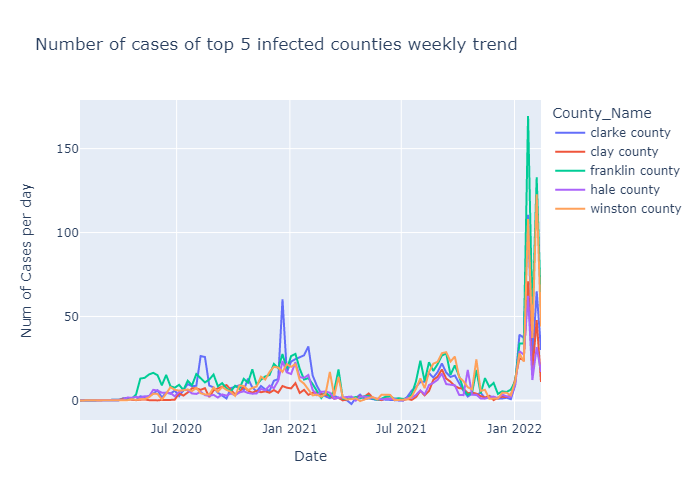

In [42]:
fig = px.line(five_county_data_top, x="Date", y="Num of Cases per day", color="County_Name",title="Number of cases of top 5 infected counties weekly trend")
fig.write_image("Priyanka_Graphs/Number of cases of top 5 infected counties weekly trend.png")
Image(filename="Priyanka_Graphs/Number of cases of top 5 infected counties weekly trend.png")
#fig.show()

### Inferences:

1. The number of cases for the franklin county is seen increasing in Jan 2022. This was the time when the new covid variant        OMNICRON spread had infected people. The lowest was in Hale county.

2. The peaks were also seen in August 2021 to December 2021 and then again in Jan 2021 to April 2021. These peaks were observed    due to social gathering and international travel to the united states. In July 2021 it was due to dealta variant and Jan 2021    was was due to the New years eve and Christmas.

3. August 2021 - December 2021 , Winston county had the highest deaths and hale county had the lowest deaths.

4. Jan 2021 to April 2021 , the highest peak was for clarke county and lowest was for clay county. 

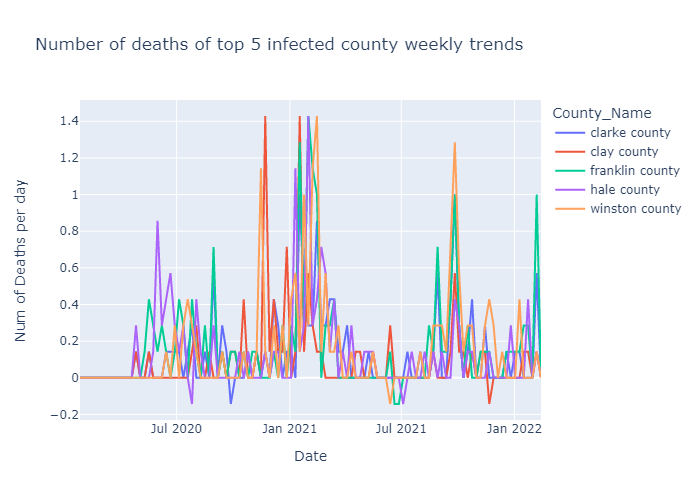

In [43]:
fig = px.line(five_county_data_top, x="Date", y="Num of Deaths per day",color="County_Name",title="Number of deaths of top 5 infected county weekly trends")
fig.write_image("Priyanka_Graphs/weekly_trends_top5_deaths.png")
Image(filename="Priyanka_Graphs/weekly_trends_top5_deaths.png")                 
#fig.show()

### Inferences:

1. In the above graph we observe many deaths over the year from  July 2020 to Jan 2022. The graph is not has sudden death rate      increase in few months and less in other days of the year. 
2. In Jan 2022 , franlin had the most deaths and winston had lowest deaths. 
3. In mid of September 2021 winston had the highest deaths and hale had less death rate.
4. In Feb  - March 2021 Clay and clarke county had more number of deaths and clay county has less death rate.
5. In July 2020 during the first covid wave hale county had the highest death rate and lowest in winston county.

### Normalized weekly new cases and deaths

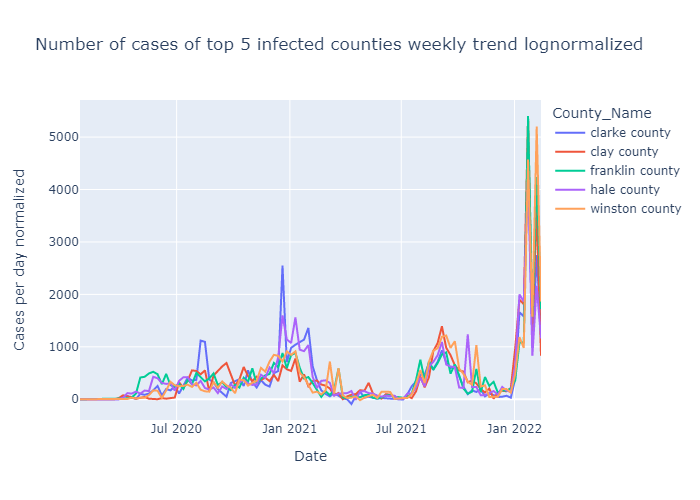

In [44]:
fig = px.line(five_county_data_top1, x="Date", y="Cases per day normalized", color="County_Name",title="Number of cases of top 5 infected counties weekly trend lognormalized")
fig.write_image("Priyanka_Graphs/Number of cases of top 5 infected counties weekly trend normalized.png")
Image(filename="Priyanka_Graphs/Number of cases of top 5 infected counties weekly trend normalized.png")
#fig.show()

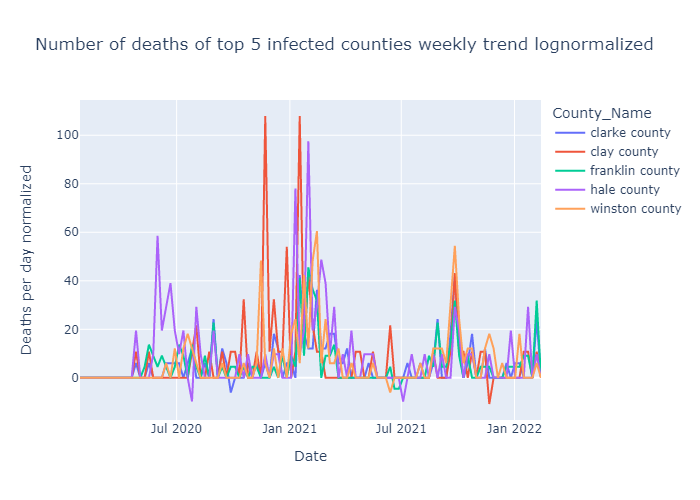

In [45]:
fig = px.line(five_county_data_top1, x="Date", y="Deaths per day normalized", color="County_Name",title="Number of deaths of top 5 infected counties weekly trend lognormalized")
fig.write_image("Priyanka_Graphs/Number of deaths of top 5 Death counties weekly trend log normalized.png")
Image(filename="Priyanka_Graphs/Number of deaths of top 5 Death counties weekly trend log normalized.png")
#fig.show()

## Log Normalized Graphs:

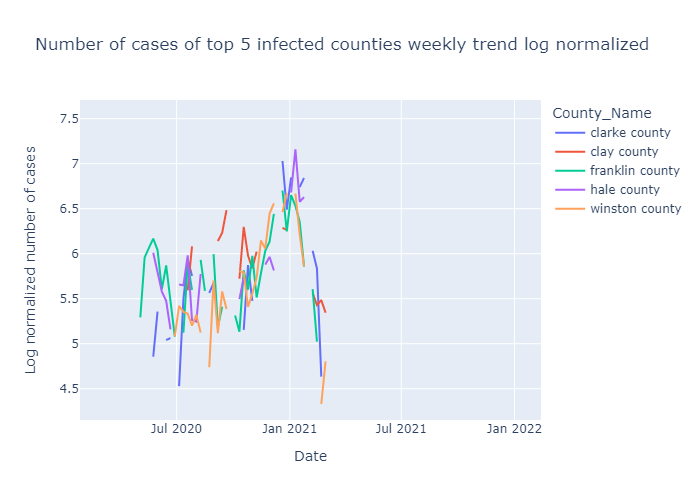

In [46]:
fig = px.line(five_county_data_top, x="Date", y="Log normalized number of cases", color="County_Name",title="Number of cases of top 5 infected counties weekly trend log normalized")
fig.write_image("Priyanka_Graphs/Number of deaths of top 5 infected counties weekly trend log normalized.png")
Image(filename="Priyanka_Graphs/Number of deaths of top 5 infected counties weekly trend log normalized.png")
#fig.show

##  Plot daily trends  of the Alabama state

In [47]:
#Alabama state data after normalisation
AL_data_groupedBydate

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized
0,2020-01-23,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
1,2020-01-24,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
2,2020-01-25,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
3,2020-01-26,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
4,2020-01-27,71489,0,0,4903185,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
742,2022-02-03,71489,1229300,17215,4903185,0.0,0.0,0.000000,0.000000
743,2022-02-04,71489,1240496,17371,4903185,11196.0,156.0,2283.413740,31.816054
744,2022-02-05,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000
745,2022-02-06,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000


In [48]:
# log normalized values: cases and deaths
AL_data_groupedBydate['Log normalized total cases'] = np.log(AL_data_groupedBydate['Cases per day normalized'])
AL_data_groupedBydate['Log normalized total deaths'] = np.log(AL_data_groupedBydate['Deaths per day normalized'])

AL_data_groupedBydate

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day,Cases per day normalized,Deaths per day normalized,Log normalized total cases,Log normalized total deaths
0,2020-01-23,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf
1,2020-01-24,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf
2,2020-01-25,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf
3,2020-01-26,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf
4,2020-01-27,71489,0,0,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...
742,2022-02-03,71489,1229300,17215,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf
743,2022-02-04,71489,1240496,17371,4903185,11196.0,156.0,2283.413740,31.816054,7.733427,3.459971
744,2022-02-05,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf
745,2022-02-06,71489,1240496,17371,4903185,0.0,0.0,0.000000,0.000000,-inf,-inf


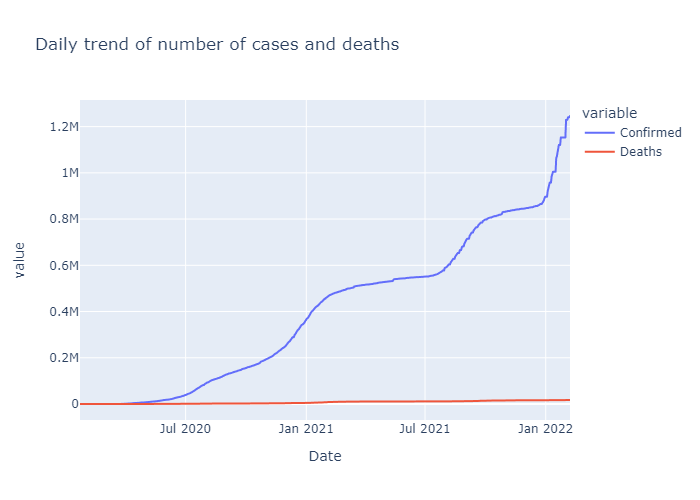

In [49]:
# cases and deaths
AL_raw_data_= covid_supermerged_data[covid_supermerged_data['State']=="AL"]
AL_data_raw_grouped = AL_raw_data_.groupby("Date").sum().reset_index()
fig = px.line(AL_data_raw_grouped, x="Date", y=["Confirmed","Deaths"],title="Daily trend of number of cases and deaths ")

fig.write_image("Priyanka_Graphs/AL_dailyCases.png")
Image(filename="Priyanka_Graphs/AL_dailyCases.png")
#fig.show()

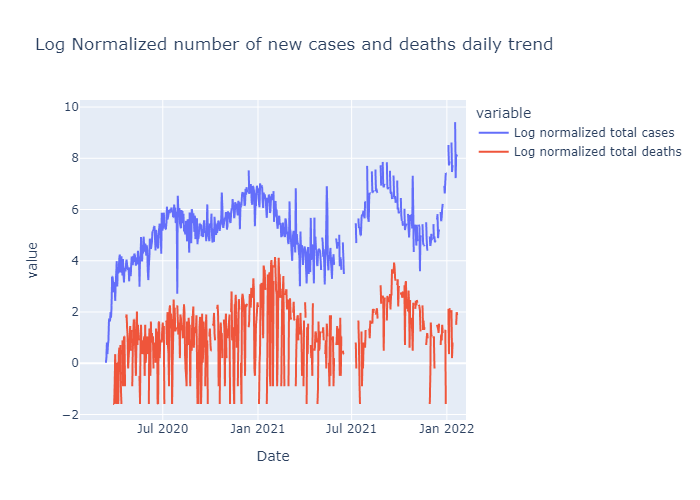

In [50]:
# Cases and deaths , log normalized daily trends 
fig = px.line(AL_data_groupedBydate, x = "Date", y=["Log normalized total cases","Log normalized total deaths"],title="Log Normalized number of new cases and deaths daily trend")
fig.write_image("Priyanka_Graphs/al_dailyLogNormalizedCases.png")
Image(filename="Priyanka_Graphs/al_dailyLogNormalizedCases.png")
#fig.show()